# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 1384 Камынин Александр Александрович и Кондратенко Константин Евгеньевич. Вариант №8.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). 

## Основные теоретические положения


**Дискретное преобразование Фурье (ДПФ)**:
Дискретное преобразование Фурье преобразует временные отсчеты в частотные компоненты, позволяя увидеть, какие частоты присутствуют в сигнале.

$ X(n) = \sum_{k=0}^{N-1} x_k e^{-i \frac{2\pi}{N} kn} $

где: $ X(n) $ — значение ДПФ на $ n $-й частоте, $ x_k $ — временной сигнал, $ N $ — общее количество отсчетов в сигнале, $ k $ — индекс частоты, который принимает значения от 0 до $ N-1 $.


**Линейное сглаживание по 5ти точкам**: $ H(\omega) = \frac{1}{5} (s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2}) $

**Линейное сглаживание по 9ти точкам**: $ H(\omega) = \frac{1}{9} (s_{n-4} + s_{n-3} + s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2} + s_{n+3} + s_{n+4}) $, где $ s_n = e^{i \omega n} $

**Cглаживание c помощью полинома второй степени по 5ти точкам**: $ H(\omega) = \frac{1}{35} (-3s_{n - 2} + 12s_{n - 1} + 17 s_n + 12s_{n + 1} -3 s_{n + 2}) $, где $ s_n = e^{i \omega n} $

**Cглаживание c помощью полинома второй степени по 9ти точкам**: $ H(\omega) = \frac{1}{231} (-21s_{n-4} + 14s_{n-3} + 39s_{n - 2} + 54s_{n - 1} + 59s_n + 54s_{n + 1} + 39s_{n + 2} + 14s_{n+3} - 21s_{n+4}) $, где $ s_n = e^{i \omega n} $

**Cглаживание c помощью полинома четвертой степени по 7ми точкам**: $ H(\omega) = \frac{1}{21} (-2s_{n-3} + 3s_{n - 2} + 6s_{n - 1} + 7s_n + 6s_{n + 1} + 3s_{n + 2} -2s_{n+3}) $, где $ s_n = e^{i \omega n} $

**Cглаживание c помощью полинома четвертой степени по 11ти точкам**: $ H(\omega) = \frac{1}{429} (-36s_{n-5} + 9s_{n-4} + 44s_{n-3} + 69s_{n - 2} + 84s_{n - 1} + 89s_n + 84s_{n + 1} + 69s_{n + 2} + 44s_{n+3} + 9s_{n+4} -36 s_{n+5}) $, где $ s_n = e^{i \omega n} $

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

In [89]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import scipy

from IPython.display import display, Math

# для воспроизводимости результатов
RANDOM_SEED = 42

In [90]:
np.random.seed(RANDOM_SEED)

### Задание 1.

Сформировать дискретный сигнал посредством дискретизации с шагом T=1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \phi_k)$. Частота каждой из гармоник не должна превышать π. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до π, изменяющимися с шагом Δω=0.1π. Амплитуды гармоник Ak представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).

Непрерывный сигнал $ x_{\text{analog}} $ был получен в соответствии со случайной генерацией амплитуды, частоты и начальной фазы в заданных пределах на промежутке [0, 32].

Для дискретного сигнала была проведена такая же генерация с шагом $T = 1$, всего последовательность включает 32 отсчета.

Формула для полученного дискретного сигнала имеет вид: $ x_{\text{discrete}}(n) = \sum_{k=1}^{11} A_k \cdot \cos(w_k \cdot n + \phi_k) $

Амплитуды гармоник нормализованы посредством деления их на сумму полученных случайным образом амплитуд: $ A'_k = \frac{A_k}{\sum_{i=1}^{11} A_i} $

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def get_signal(N=1):
    omega_k = np.linspace(0, np.pi, 11)
    A_k = np.random.randint(1, 12, size=11)
    phi_k = np.random.uniform(0, 0.5, size=11)

    A_k_normalized = A_k / np.sum(A_k)

    t = np.linspace(0, 32, N)
    x_t = np.zeros_like(t, dtype=float)

    for k in range(11):
        x_t += A_k_normalized[k] * np.cos(omega_k[k] * t + phi_k[k])
        
    return t, x_t

t_discrete, x_discrete = get_signal(N=32)
t_analog, x_analog = get_signal(N=10000)

### Задание 2.

Визуализировать исходные аналоговый и дискретизированный сигналы.

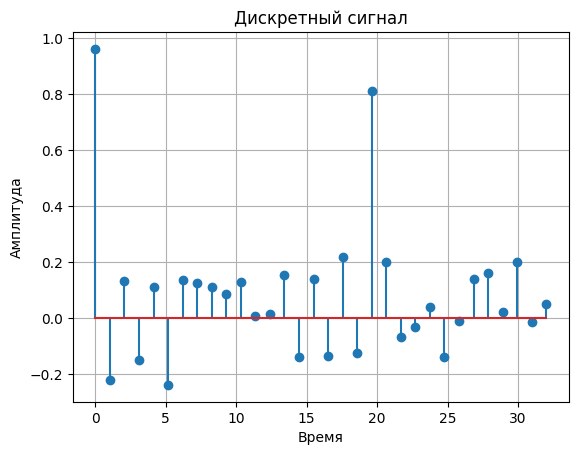

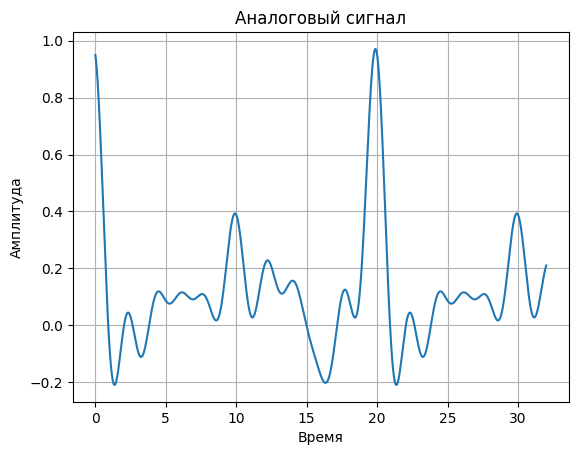

In [92]:
plt.stem(t_discrete, x_discrete)
plt.title('Дискретный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

plt.plot(t_analog, x_analog)
plt.title('Аналоговый сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

### Задание 3.

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Перепишем дискретный сигнал в виде суммы сдвигов дельта-функции:

$$ s_{\text{discrete}} (t) = \sum_{k=-\infty}^{+\infty} s(t) \delta(t - kT) $$

Знаем, что сигнал дискретный гармонический, поэтому можно переписать его в виде ряда Фурье:

$$ \sum_{k=-\infty}^{+\infty} \delta(t - kT) = \sum_{k=-\infty}^{+\infty} c_k \cdot e^{i \omega_k t} $$ 

где $ \omega_k = \frac{2 \pi k}{T} $, $ c_k = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} \delta(t) e^{-i \omega_k t} dt = \frac{1}{T} $

Итого, дискретный сигнал принимает вид:

$$ s_{\text{discrete}} (t) = \frac{1}{T} \sum_{k=-\infty}^{+\infty} s(t) e^{i \omega_k t} $$

Спектр сигнала имеет вид:

$$ S_{\text{discrete}}(\omega) = \frac{1}{T} \sum_{k=-\infty}^{+\infty} S(\omega - \frac{2 \pi k}{T}) $$

Для получения спектра с помощью ДПФ будем пользоваться готовыми реализациями из библиотеки SciPy:
- ДПФ (БПФ, FFT): https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft
- Получение частот спектра: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html


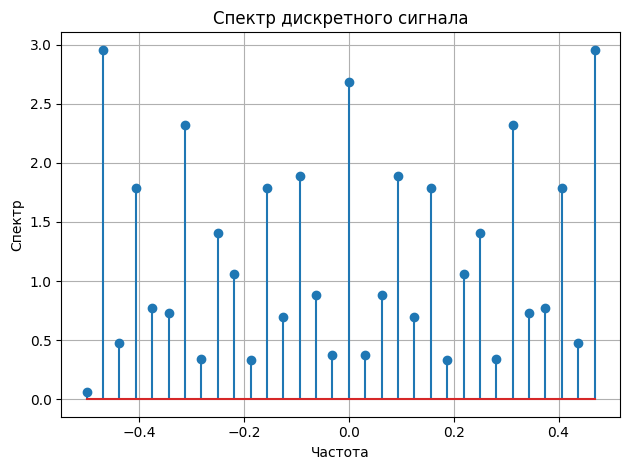

In [93]:
from scipy.fftpack import fft, fftfreq

def compute_dft(x):
    X_fft = fft(x)
    frequencies = fftfreq(d=1, n=32)
    return frequencies, X_fft

freq, x_fft = compute_dft(x_discrete)
spectrum = np.abs(x_fft)

plt.stem(freq, spectrum)
plt.title('Спектр дискретного сигнала')
plt.xlabel('Частота')
plt.ylabel('Спектр')
plt.grid(True)
plt.tight_layout()
plt.show()

### Задача 4.

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

Формулы для линейного сглаживания по 5ти и 9ти точкам (в формулах $ s_n = e^{i \omega n} $):

По 5ти: $ H(\omega) = \frac{1}{5} (s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2}) $

По 9ти: $ H(\omega) = \frac{1}{9} (s_{n-4} + s_{n-3} + s_{n - 2} + s_{n - 1} + s_n + s_{n + 1} + s_{n + 2} + s_{n+3} + s_{n+4}) $

Применение фильтра, соответствующего линейному сглаживанию, соответствует операции свертки исходного сигнала с фильтром, определенным оконной функцией. В данном случае окна - веса каждого сигнала, они равны 1/5 и 1/9 соответственно.

Для применения фильтра воспользуемся готовой реализацией в Numpy:
- https://numpy.org/doc/stable/reference/generated/numpy.convolve.html


In [94]:
lin_5 = np.convolve(x_discrete, np.ones(5) / 5, mode='same')
lin_9 = np.convolve(x_discrete, np.ones(9) / 9, mode='same')

### Задача 5.

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

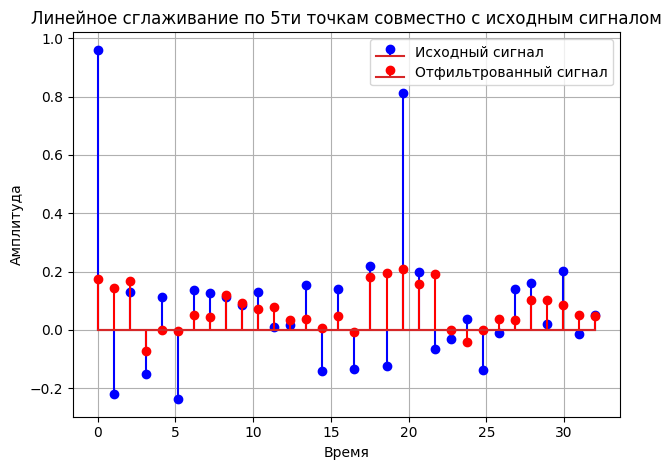

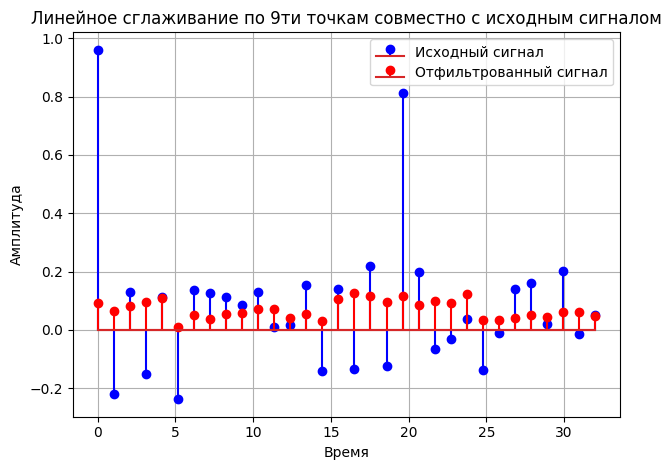

In [95]:
plt.stem(t_discrete, x_discrete, 'b', label='Исходный сигнал')
plt.stem(t_discrete, lin_5, 'r-', label="Отфильтрованный сигнал")
plt.title('Линейное сглаживание по 5ти точкам совместно с исходным сигналом')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.stem(t_discrete, x_discrete, 'b', label='Исходный сигнал')
plt.stem(t_discrete, lin_9, 'r-', label="Отфильтрованный сигнал")
plt.title('Линейное сглаживание по 9ти точкам совместно с исходным сигналом')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Задача 6.

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

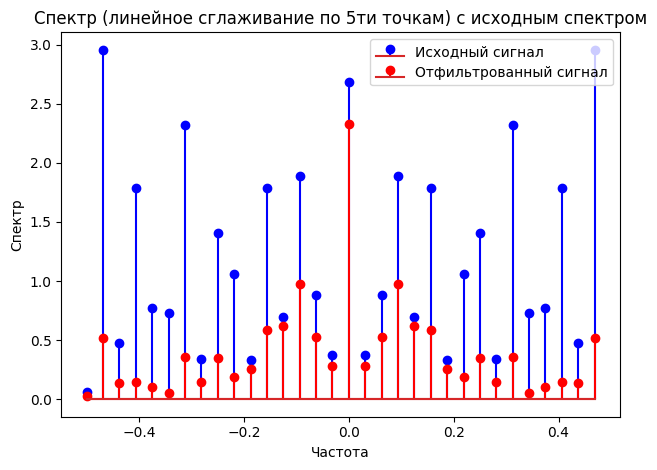

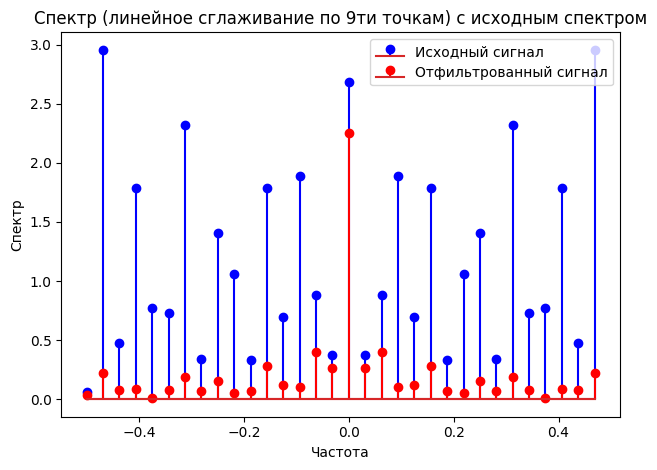

In [96]:
freq, x_filtered5_fft = compute_dft(lin_5)
lin5_spectrum = np.abs(x_filtered5_fft)

plt.stem(freq, spectrum, 'b', label="Исходный сигнал")
plt.stem(freq, lin5_spectrum, 'r-', label='Отфильтрованный сигнал')
plt.ylabel('Спектр')
plt.xlabel('Частота')
plt.title('Спектр (линейное сглаживание по 5ти точкам) c исходным спектром')
plt.legend()
plt.tight_layout()
plt.show()


freq, x_filtered9_fft = compute_dft(lin_9)
lin9_spectrum = np.abs(x_filtered9_fft)

plt.stem(freq, spectrum, 'b', label="Исходный сигнал")
plt.stem(freq, lin9_spectrum, 'r-', label='Отфильтрованный сигнал')
plt.ylabel('Спектр')
plt.xlabel('Частота')
plt.title('Спектр (линейное сглаживание по 9ти точкам) с исходным спектром')
plt.legend()
plt.tight_layout()
plt.show()

### Задача 7.

Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

По построенным графикам можно сделать следующие выводы:
1. При использовании сглаживания на **пяти** точкам амплитуды высокочастотных компонент усредняются, что делает результирующий сигнал более однородным по частотам. Фильтр сглаживает получаемый сигнал, приводя его вид к средним значениям.
2. При использовании сглаживания на **девяти** точкам амплитуды высокочастотных компонент усредняются сильнее, чем в случае сглаживания по пяти точкам. Фильтр сглаживает получаемый сигнал, приводя его вид к средним значениям, но из-за того, что одновременно рассматриваются 9 точек, то и усреднение более выраженное.

### Задача 8.

Повторить п. 4–7 для следующих фильтров:
- Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
- Сглаживание полиномом 4-ой степени по 7 и 11 узлам.


Для применения сглаживания по n точкам для полиномов m степени будем использовать `scipy.signal.savgol_filter`. Это функция из библиотеки SciPy, которая используется для сглаживания данных с помощью фильтра Савицкого-Голея. Этот фильтр применяет полиномиальную аппроксимацию (в качестве степени многочлена задается аргумент `polyorder` -- m) к окну данных (`window_length` -- количеству рассматриваемых точек -- n), чтобы сгладить сигнал и уменьшить шум. Подробнее с функцией можно ознакомиться по [ссылке.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html)

In [97]:
from scipy.signal import savgol_filter

poly2_5 = savgol_filter(x_discrete, window_length=5, polyorder=2)
poly2_9 = savgol_filter(x_discrete, window_length=9, polyorder=2)

poly4_7 = savgol_filter(x_discrete, window_length=7, polyorder=4)
poly4_11 = savgol_filter(x_discrete, window_length=11, polyorder=4)

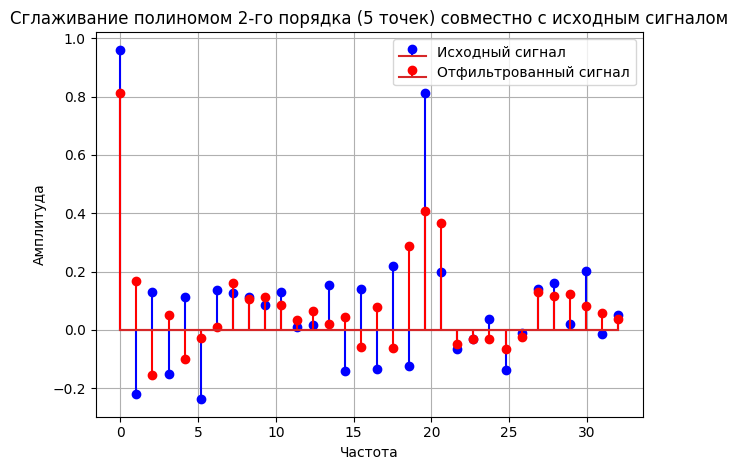

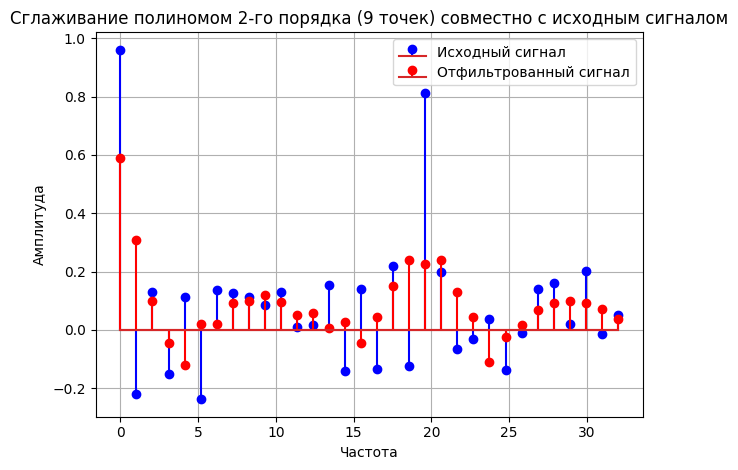

In [98]:
plt.stem(t_discrete, x_discrete, 'b', label='Исходный сигнал')
plt.stem(t_discrete, poly2_5, 'r-', label="Отфильтрованный сигнал")
plt.title('Сглаживание полиномом 2-го порядка (5 точек) совместно с исходным сигналом')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.stem(t_discrete, x_discrete, 'b', label='Исходный сигнал')
plt.stem(t_discrete, poly2_9, 'r-', label="Отфильтрованный сигнал")
plt.title('Сглаживание полиномом 2-го порядка (9 точек) совместно с исходным сигналом')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

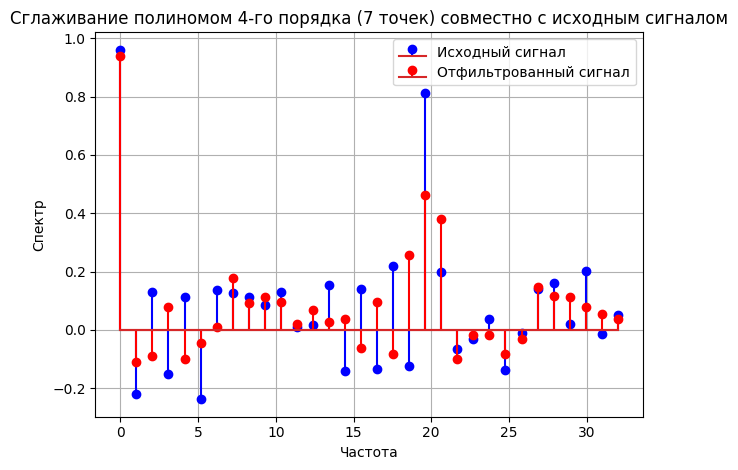

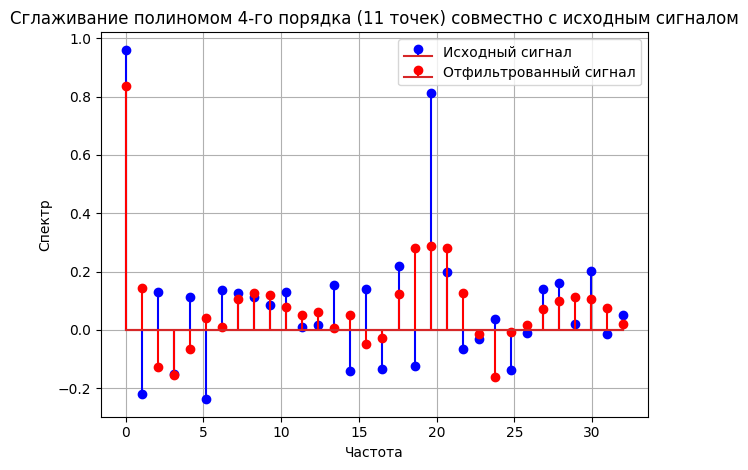

In [99]:
plt.stem(t_discrete, x_discrete, 'b', label='Исходный сигнал')
plt.stem(t_discrete, poly4_7, 'r-', label="Отфильтрованный сигнал")
plt.title('Сглаживание полиномом 4-го порядка (7 точек) совместно с исходным сигналом')
plt.xlabel('Частота')
plt.ylabel('Спектр')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.stem(t_discrete, x_discrete, 'b', label='Исходный сигнал')
plt.stem(t_discrete, poly4_11, 'r-', label="Отфильтрованный сигнал")
plt.title('Сглаживание полиномом 4-го порядка (11 точек) совместно с исходным сигналом')
plt.xlabel('Частота')
plt.ylabel('Спектр')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

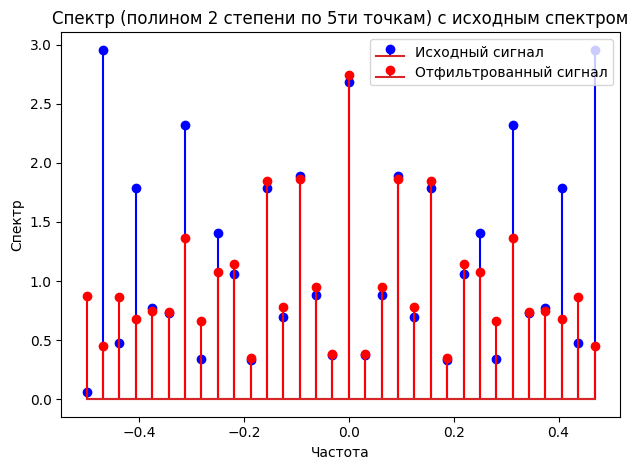

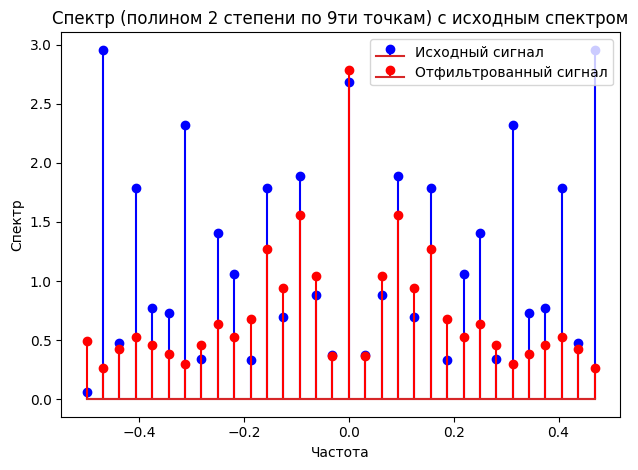

In [100]:
freq, poly2_5_spectrum = compute_dft(poly2_5)
poly2_5_spectrum = np.abs(poly2_5_spectrum)

plt.stem(freq, spectrum, 'b', label='Исходный сигнал')
plt.stem(freq, poly2_5_spectrum, 'r-', label="Отфильтрованный сигнал")
plt.ylabel('Спектр')
plt.xlabel('Частота')
plt.title('Спектр (полином 2 степени по 5ти точкам) с исходным спектром')
plt.legend()
plt.tight_layout()
plt.show()


freq, poly2_9_spectrum = compute_dft(poly2_9)
poly2_9_spectrum = np.abs(poly2_9_spectrum)

plt.stem(freq, spectrum, 'b', label='Исходный сигнал')
plt.stem(freq, poly2_9_spectrum, 'r-', label="Отфильтрованный сигнал")
plt.ylabel('Спектр')
plt.xlabel('Частота')
plt.title('Спектр (полином 2 степени по 9ти точкам) с исходным спектром')
plt.legend()
plt.tight_layout()
plt.show()

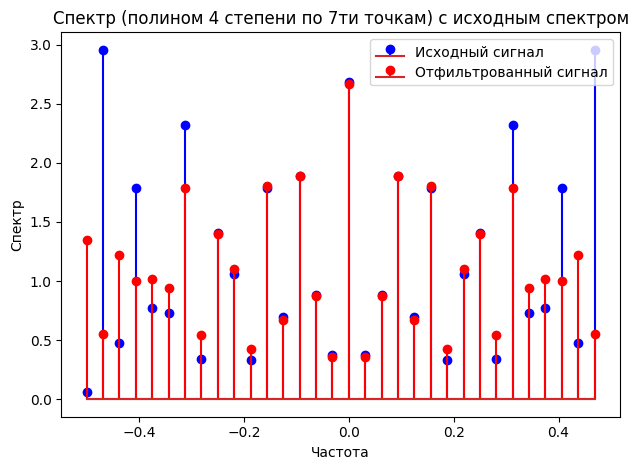

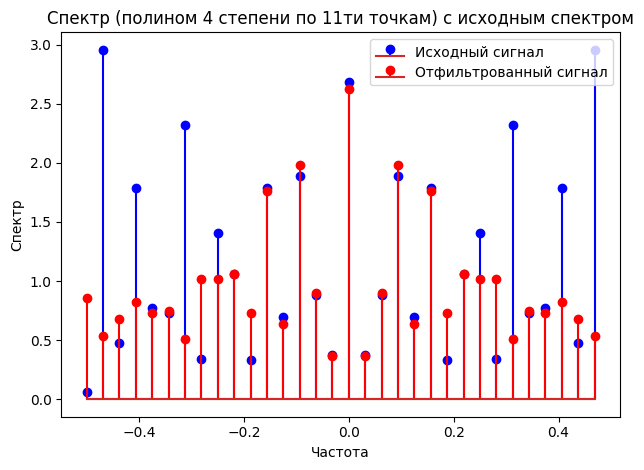

In [101]:
freq, poly4_7_spectrum = compute_dft(poly4_7)
poly4_7_spectrum = np.abs(poly4_7_spectrum)

plt.stem(freq, spectrum, 'b', label='Исходный сигнал')
plt.stem(freq, poly4_7_spectrum, 'r-', label="Отфильтрованный сигнал")
plt.ylabel('Спектр')
plt.xlabel('Частота')
plt.title('Спектр (полином 4 степени по 7ти точкам) с исходным спектром')
plt.legend()
plt.tight_layout()
plt.show()


freq, poly4_11_spectrum = compute_dft(poly4_11)
poly4_11_spectrum = np.abs(poly4_11_spectrum)

plt.stem(freq, spectrum, 'b', label='Исходный сигнал')
plt.stem(freq, poly4_11_spectrum, 'r-', label="Отфильтрованный сигнал")
plt.ylabel('Спектр')
plt.xlabel('Частота')
plt.title('Спектр (полином 4 степени по 11ти точкам) с исходным спектром')
plt.legend()
plt.tight_layout()
plt.show()

### Задача 9.

Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

По результатам, полученным в ходе выполнения работы можно сделать следующие выводы:
1. Дискретный сигнал с выбранной частотой дискретизации представляет собой "упрощенную" модель исходного сигнала. Фильтры, применяемые к дискретному сигналу, в основной своей массе усредняют значения дискретных отсчетов — сглаживают пики высоких частот, делая набор дискретных значений более однородным. Линейное сглаживание сильно усредняет значения, при этом усреднение по 9 точкам происходит сильнее, чем по 5. Это делает сигнал более однородным, но может привести к потере значительной части информации, особенно в области высоких и низких значений.
4. Сглаживание полиномом второй степени не так сильно искажает сигнал, как линейное сглаживание. Сглаживание полиномом второй степени также усредняет высокие значения, однако можно сказать, что сглаживание по 11 точкам характеризуется большей реактивностью, то есть эффект сглаживания выше. Это приводит к ситуациям, когда при сильной осцилляции входного сигнала сглаживание полиномом второй степени может сильно искажать сигнал, приводя к тому, что после фильтрации дискретные значения могут отличаться даже по знаку.
5. Сглаживание полиномом четвертой степени продемонстрировало самую высокую адаптивность — артефактов со знаками, которые наблюдались при применении других фильтров, стало значительно меньше.сказать, что сглаживание по 11 точка характеризуется большей реактивностью, то есть эффект сглаживания выше. Это приводит к ситуациям, что при сильной асциляции входного сигнала, сглаживание полиномом второй степени может сильно искажать сигнал, приводя к тому, что после фильтрации дискретные значения отличются даже по знаку.
6. Сглаживание полиномом 2-ой продемонстрировало самую высокую адаптивность -- артефактов со знаками, которые наблюдались при применении других фильтров, стало значительно меньше.

## Выводы


В ходе выполнения лабораторной работы, сформирован аналоговый и на его основе дискретный сигнал, к которому применены следующие дискретные фильтры:
1. Линейное сглаживание по 5 и 9 точкам
2. Сглаживание полиномом 2-ой степени по 5 и 9 точкам
3. Сглажианием полиномом 4-ой степени по 7 и 11 точкам

Дискретный и аналоговый сигналы визуализированы средствами Python. В целях изучения поведения дискретных нерекурсивных фильтров визуализированы значения сигнала до фильтрации и после, благодаря чему оценено влияние фильтра на входной сигнал. Также силами Python с помощью дискретного преобразования Фурье найдены отсчеты спектра для исходного дискретного сигнала и для результатов его фильтрации дискретными нерекурсивными фильтрами, перечисленными выше.